<a href="https://colab.research.google.com/github/malindard/British-Airways-Virtual-Experience/blob/main/Task%201%20-%20Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 12
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | After travelling London to ...
1,✅ Trip Verified | My luggage was mis-tagged i...
2,✅ Trip Verified | The airline lost my luggage...
3,✅ Trip Verified | We booked on the BA website...
4,✅ Trip Verified | First time flying with BA b...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages! ▶ I increased the page number to 12

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

Removing the parts before | in the reviews column

In [ ]:
df.reviews = df.reviews.str.split('|', expand=True)[1]

In [ ]:
df

,reviews
0,After travelling London to Madrid with Briti...
1,My luggage was mis-tagged in Dallas on my wa...
2,The airline lost my luggage and was absolute...
3,"We booked on the BA website, round trip flig..."
4,"First time flying with BA business class, ne..."
...,...
1195,Flew on BA 1414 from London Heathrow to Belfa...
1196,I was supposed to fly from New York to Paris...
1197,Flew Singapore to Madrid via London Heathrow ...
1198,Gatwick to Tobago. Many years since I've flo...


**Rule-based approach**

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

**Data preprocessing steps:**

Cleaning the text

1. Cleaning the text
2. Tokenization
3. Enrichment – POS tagging
4. Stopwords removal
5. Obtaining the stem words

## 1. Cleaning the text

In [ ]:
import re

def clean(text):
  # Removes all special characters and numericals leaving the alphabets
  text = re.sub('[^A-Za-z]+', ' ', str(text))
  return text

# Cleaning the text in reviews column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,After travelling London to Madrid with Briti...,After travelling London to Madrid with Britis...
1,My luggage was mis-tagged in Dallas on my wa...,My luggage was mis tagged in Dallas on my way...
2,The airline lost my luggage and was absolute...,The airline lost my luggage and was absolutel...
3,"We booked on the BA website, round trip flig...",We booked on the BA website round trip flight...
4,"First time flying with BA business class, ne...",First time flying with BA business class neve...


## Step 2: Tokenization
Tokenization refers to the process of dividing the text into smaller units called Tokens. This can be done either at the sentence level (sentence tokenization) or at the word level (word tokenization).

## Step 3: Enrichment – POS tagging
Parts of Speech (POS) tagging involves assigning a tag to each token in the text, creating a tuple in the form of (word, tag). POS tagging is important for preserving the word's context and is necessary for Lemmatization.

## Step 4: Removal of stopwords
Stopwords are words in English that carry little meaningful information. Removing them is a crucial step in text preprocessing. The nltk library provides a list of stopwords for different languages.

## Step 5: Obtaining stem words
A stem is a part of a word that carries its basic meaning. There are two popular techniques for obtaining the root or stem words: Stemming and Lemmatization.

The key difference is that Stemming often produces root words that may not have any meaningful interpretation, as it simply removes certain characters from the end. On the other hand, Lemmatization yields meaningful root words, but it requires the POS tags of the words.

In [ ]:
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


NLTK is a popular platform that offers Python developers a comprehensive toolkit for working with human language data. It offers user-friendly interfaces to more than 50 corpora and lexical resources, including WordNet.

Additionally, it provides a range of text processing libraries that cover tasks such as classification, tokenization, stemming, tagging, parsing, and semantic reasoning. It also includes wrappers for robust NLP libraries used in industry.

One of the tools provided by NLTK is the punkt tokenizer, which utilizes an unsupervised algorithm to divide a given text into a list of sentences. This tokenizer is designed to create a model for handling abbreviation words, collocations, and sentence-initial words.

In [ ]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,After travelling London to Madrid with Briti...,After travelling London to Madrid with Britis...,"[(travelling, v), (London, n), (Madrid, n), (B..."
1,My luggage was mis-tagged in Dallas on my wa...,My luggage was mis tagged in Dallas on my way...,"[(luggage, n), (mis, r), (tagged, v), (Dallas,..."
2,The airline lost my luggage and was absolute...,The airline lost my luggage and was absolutel...,"[(airline, n), (lost, v), (luggage, n), (absol..."
3,"We booked on the BA website, round trip flig...",We booked on the BA website round trip flight...,"[(booked, v), (BA, n), (website, n), (round, n..."
4,"First time flying with BA business class, ne...",First time flying with BA business class neve...,"[(First, a), (time, n), (flying, v), (BA, n), ..."


In [ ]:
# Obtaining the stem words – Lemmatization
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemmatization'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemmatization
0,After travelling London to Madrid with Briti...,After travelling London to Madrid with Britis...,"[(travelling, v), (London, n), (Madrid, n), (B...",travel London Madrid British Airways Iberia ...
1,My luggage was mis-tagged in Dallas on my wa...,My luggage was mis tagged in Dallas on my way...,"[(luggage, n), (mis, r), (tagged, v), (Dallas,...",luggage mis tag Dallas way Cairo via London ...
2,The airline lost my luggage and was absolute...,The airline lost my luggage and was absolutel...,"[(airline, n), (lost, v), (luggage, n), (absol...",airline lose luggage absolutely awful throug...
3,"We booked on the BA website, round trip flig...",We booked on the BA website round trip flight...,"[(booked, v), (BA, n), (website, n), (round, n...",book BA website round trip flight Seattle Am...
4,"First time flying with BA business class, ne...",First time flying with BA business class neve...,"[(First, a), (time, n), (flying, v), (BA, n), ...",First time fly BA business class never board...


In [ ]:
df[['reviews','Lemmatization']]

,reviews,Lemmatization
0,After travelling London to Madrid with Briti...,travel London Madrid British Airways Iberia ...
1,My luggage was mis-tagged in Dallas on my wa...,luggage mis tag Dallas way Cairo via London ...
2,The airline lost my luggage and was absolute...,airline lose luggage absolutely awful throug...
3,"We booked on the BA website, round trip flig...",book BA website round trip flight Seattle Am...
4,"First time flying with BA business class, ne...",First time fly BA business class never board...
...,...,...
1195,Flew on BA 1414 from London Heathrow to Belfa...,Flew BA London Heathrow Belfast City Airport...
1196,I was supposed to fly from New York to Paris...,suppose fly New York Paris direct flight can...
1197,Flew Singapore to Madrid via London Heathrow ...,Flew Singapore Madrid via London Heathrow Br...
1198,Gatwick to Tobago. Many years since I've flo...,Gatwick Tobago Many year since fly BA club c...


## Sentiment Analysis with VADER
VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemmatization'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df

,reviews,Cleaned Reviews,POS tagged,Lemmatization,Sentiment,Analysis
0,After travelling London to Madrid with Briti...,After travelling London to Madrid with Britis...,"[(travelling, v), (London, n), (Madrid, n), (B...",travel London Madrid British Airways Iberia ...,-0.6486,Negative
1,My luggage was mis-tagged in Dallas on my wa...,My luggage was mis tagged in Dallas on my way...,"[(luggage, n), (mis, r), (tagged, v), (Dallas,...",luggage mis tag Dallas way Cairo via London ...,-0.6124,Negative
2,The airline lost my luggage and was absolute...,The airline lost my luggage and was absolutel...,"[(airline, n), (lost, v), (luggage, n), (absol...",airline lose luggage absolutely awful throug...,-0.8479,Negative
3,"We booked on the BA website, round trip flig...",We booked on the BA website round trip flight...,"[(booked, v), (BA, n), (website, n), (round, n...",book BA website round trip flight Seattle Am...,0.3818,Neutral
4,"First time flying with BA business class, ne...",First time flying with BA business class neve...,"[(First, a), (time, n), (flying, v), (BA, n), ...",First time fly BA business class never board...,-0.5719,Negative
...,...,...,...,...,...,...
1195,Flew on BA 1414 from London Heathrow to Belfa...,Flew on BA from London Heathrow to Belfast Ci...,"[(Flew, n), (BA, n), (London, n), (Heathrow, n...",Flew BA London Heathrow Belfast City Airport...,0.8225,Positive
1196,I was supposed to fly from New York to Paris...,I was supposed to fly from New York to Paris ...,"[(supposed, v), (fly, v), (New, n), (York, n),...",suppose fly New York Paris direct flight can...,-0.9260,Negative
1197,Flew Singapore to Madrid via London Heathrow ...,Flew Singapore to Madrid via London Heathrow ...,"[(Flew, n), (Singapore, n), (Madrid, n), (via,...",Flew Singapore Madrid via London Heathrow Br...,-0.6289,Negative
1198,Gatwick to Tobago. Many years since I've flo...,Gatwick to Tobago Many years since I ve flown...,"[(Gatwick, n), (Tobago, n), (Many, n), (years,...",Gatwick Tobago Many year since fly BA club c...,0.5719,Positive


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    617
Negative    452
Neutral     131
Name: Analysis, dtype: int64

### Percentage Review Analysis

([<matplotlib.patches.Wedge at 0x7fc24b4dbca0>,
 [Text(-0.04894027851480681, 1.098910755766315, 'Positive'),
  Text(-0.3234444522546508, -1.0513722872064344, 'Negative'),
  Text(1.271381839698821, -0.4539694017046102, 'Neutral')],
 [Text(-0.026694697371712803, 0.5994058667816262, '51.4%'),
  Text(-0.17642424668435494, -0.5734757930216914, '37.7%'),
  Text(0.8004996768474058, -0.28583258625845825, '10.9%')])

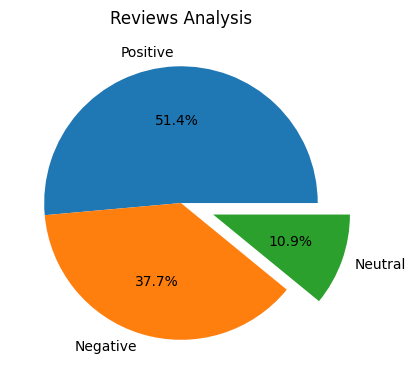

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

### Most Frequently Spoken Word

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

data = df['Lemmatization']

# Merges all text into one long text
merge = ' '.join(data)

# Separating the words
keywords = word_tokenize(merge, language='english')

Word: flight, Frequency: 2420
Word: BA, Frequency: 1446
Word: seat, Frequency: 1167
Word: service, Frequency: 858
Word: London, Frequency: 779
Word: time, Frequency: 720
Word: get, Frequency: 705
Word: hour, Frequency: 626
Word: good, Frequency: 605
Word: crew, Frequency: 559


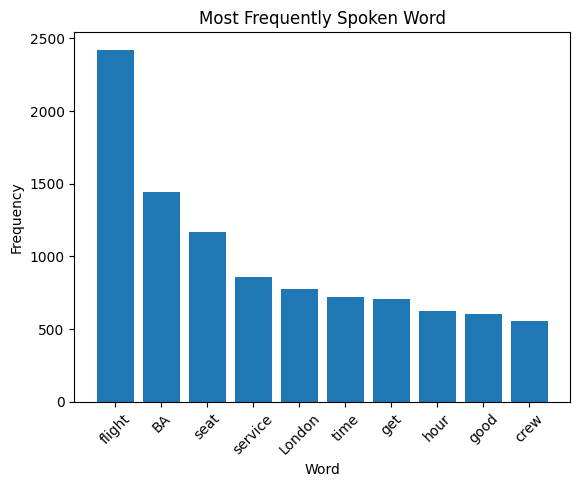

In [ ]:
# Count the word frequency using FreqDist
freq = FreqDist(keywords)

# Sort words based on the frequency of the 10 most
most_word = freq.most_common(10)

for kata, frekuensi in most_word:
    print(f'Word: {kata}, Frequency: {frekuensi}')

word = [k[0] for k in most_word]
number = [k[1] for k in most_word]

# Bar chart
plt.bar(word, number)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Frequently Spoken Word')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.to_csv("BA_reviews.csv")

## Wordcloud

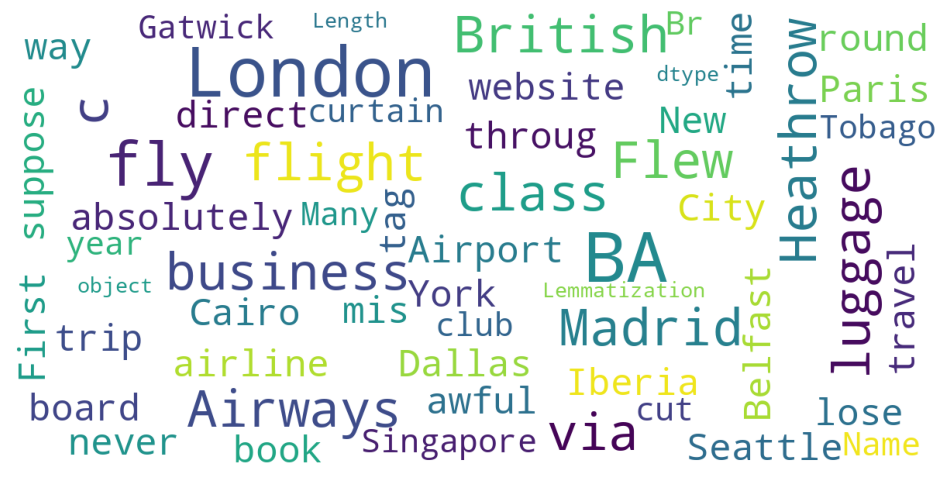

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemmatization)